# 2. Linear Regression                                                                                                                    
For the most prominent feature selected in step a, develop a linear regression object tha predicts wine quality. Perform the experiment 3 times, each time with a different a.

# (a) White wine

As a consequence of the first exercise, the most prominent feature of white wine is alcohol. 

import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

Read data from csv

In [2]:
data = pd.read_csv("/home/mscuser/Desktop/winequality-white.csv", sep=';')
quality = data['quality'].values
alcohol = data['alcohol'].values

The plot reveals some degree of correlation between the two features.

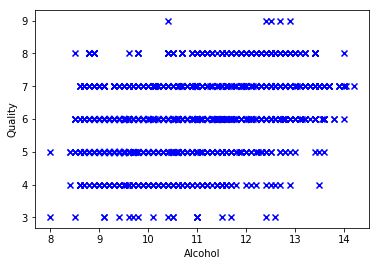

In [3]:
%matplotlib inline
plt.scatter(alcohol, quality, marker='x', color='blue')
plt.xlabel('Alcohol')
plt.ylabel('Quality')

Iplementing the cost function for linear regression, specifically mean squared error (MSE). 
Intuitively, MSE represents an aggregation of the distances between point’s actual y value and 
what a hypothesis function h(x) predicted it would be. 

In [4]:
def compute_cost(X, y, theta):
    return np.sum(np.square(np.matmul(X, theta) - y)) / (2 * len(y))

Before computing the cost with an initial guess for theta, a column of 1s is prepended onto the input data. 
This allows us to vectorize the cost function. 

In [5]:
theta = np.zeros(2)
X = np.column_stack((np.ones(len(alcohol)), alcohol))
y = quality
cost = compute_cost(X, y, theta)

print('theta:', theta)
print('cost:', cost)

('theta:', array([ 0.,  0.]))
('cost:', 17.667006941608818)


Minimize the cost using the gradient descent algorithm. Intuitively, gradient descent takes small, linear hops down the slope of a function in each feature dimension, with the size of each hop determined by the partial derivative of the cost function with respect to that feature and a learning rate multiplier α. If tuned properly, the algorithm converges on a global minimum by iteratively adjusting feature weights θ of the cost function,

In [6]:
def gradient_descent(X, y, alpha, iterations):
    theta = np.zeros(2)
    m = len(y)

    for i in range(iterations):
        w0 = theta[0] - (alpha / m) * np.sum(np.dot(X, theta) - y)
        w1 = theta[1] - (alpha / m) * np.sum((np.dot(X, theta) - y) * X[:,1])
        theta = np.array([w0, w1])

    return theta

Three different examples with different alpha values are going to be presented

# iterations = 100 & alpha = 0.01

In [7]:
iterations = 100
alpha = 0.01

theta = gradient_descent(X, y, alpha, iterations)
cost = compute_cost(X, y, theta)

print("theta:", theta)
print('cost:', compute_cost(X, y, theta))

('theta:', array([ 0.08535941,  0.54774256]))
('cost:', 0.35981634585981925)


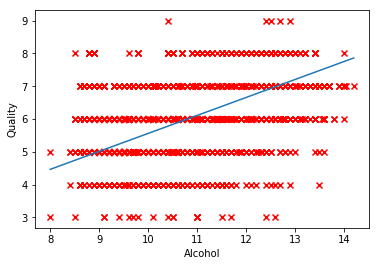

In [8]:
plt.scatter(alcohol, quality, marker='x', color='red')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
samples = np.linspace(min(alcohol), max(alcohol))
plt.plot(samples, theta[0] + theta[1] * samples)

A surface plot is a better illustration of how gradient descent approaches a global minimum, 
plotting the values for theta against their associated cost.

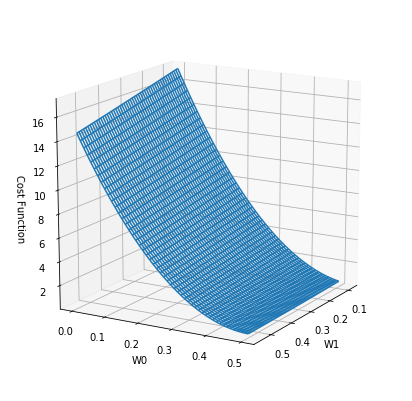

In [9]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

Xs, Ys = np.meshgrid(np.linspace(0.08535941,  0.54774256), np.linspace(0,  0.5))
Zs = np.array([compute_cost(X, y, [w0, w1]) for w0, w1 in zip(np.ravel(Xs), np.ravel(Ys))])
Zs = np.reshape(Zs, Xs.shape)

fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection="3d")
ax.set_xlabel(r'W1')
ax.set_ylabel(r'W0')
ax.set_zlabel(r'Cost Function')
ax.view_init(elev=15, azim=30)
ax.plot_wireframe(Xs, Ys, Zs) 

# iterations = 100 & alpha = 0.001

In [10]:
iterations = 100
alpha = 0.001

theta = gradient_descent(X, y, alpha, iterations)
cost = compute_cost(X, y, theta)

print("theta:", theta)
print('cost:', compute_cost(X, y, theta))

('theta:', array([ 0.05508023,  0.55058039]))
('cost:', 0.36084392973089774)


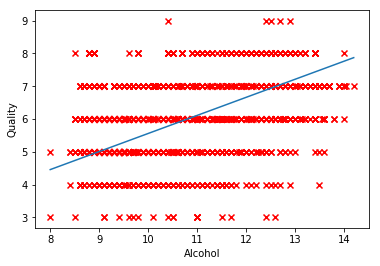

In [11]:
plt.scatter(alcohol, quality, marker='x', color='red')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
samples = np.linspace(min(alcohol), max(alcohol))
plt.plot(samples, theta[0] + theta[1] * samples)

# iterations = 100 & alpha = 0.005

In [12]:
iterations = 100
alpha = 0.005

theta = gradient_descent(X, y, alpha, iterations)
cost = compute_cost(X, y, theta)

print("theta:", theta)
print('cost:', compute_cost(X, y, theta))

('theta:', array([ 0.06858244,  0.54931683]))
('cost:', 0.36038418080109541)


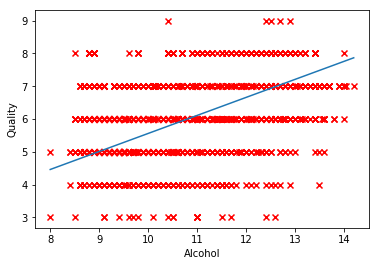

In [13]:
plt.scatter(alcohol, quality, marker='x', color='red')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
samples = np.linspace(min(alcohol), max(alcohol))
plt.plot(samples, theta[0] + theta[1] * samples)

All the experinments for white wine seem to fit descent on the given data.
As for the best alpha value, the algorithm converges faster for alpha 0.01. While decreasing alpha values 
the algorithm needs more iteration in order to converge. 
As for the scaling, it seems that the fact that the experiment takes into consideration only one feature, 
leads to the cocnlusion that scaling does not affect alpha. It would affect alpha in case of more attributes.

Source: https://crsmithdev.com/blog/ml-linear-regression/
        http://mccormickml.com/2014/03/04/gradient-descent-derivation/